In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-rc0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-rc0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape) # x
print(housing.target.shape) # y

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 划分样本
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7 # 随机种子
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11
)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# 自定义网格搜索
# learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learining_rate

learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    
    model = keras.models.Sequential([
        keras.layers.Dense(4,activation="relu",
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(lr)
    model.compile(loss = "mean_squared_error",               # 损失函数
                  optimizer = optimizer,)                    # 模型的求解方法
                
    callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

    # epochs 训练集遍历次数
    history = model.fit(x_train_scaled,y_train,epochs=100,
              validation_data=(x_valid_scaled,y_valid),
              callbacks=callbacks)
    
    # 保存所有的history
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 114us/sample - loss: 3.7502 - val_loss: 3.5249
Epoch 2/100
11610/11610 [==============================] - 1s 72us/sample - loss: 3.4645 - val_loss: 3.2360
Epoch 3/100
11610/11610 [==============================] - 1s 77us/sample - loss: 3.1947 - val_loss: 2.9554
Epoch 4/100
11610/11610 [==============================] - 1s 78us/sample - loss: 2.9348 - val_loss: 2.6880
Epoch 5/100
11610/11610 [==============================] - 1s 89us/sample - loss: 2.6904 - val_loss: 2.4385
Epoch 6/100
11610/11610 [==============================] - 1s 72us/sample - loss: 2.4645 - val_loss: 2.2092
Epoch 7/100
11610/11610 [==============================] - 1s 77us/sample - loss: 2.2601 - val_loss: 2.0035
Epoch 8/100
11610/11610 [==============================] - 1s 74us/sample - loss: 2.0756 - val_loss: 1.8207
Epoch 9/100
11610/11610 [==============================] - 1s 72us/sample - loss: 1.91

11610/11610 [==============================] - 1s 74us/sample - loss: 0.5209 - val_loss: 0.4641
Epoch 69/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5174 - val_loss: 0.4622
Epoch 70/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5141 - val_loss: 0.4606
Epoch 71/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5111 - val_loss: 0.4591
Epoch 72/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5081 - val_loss: 0.4576
Epoch 73/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5054 - val_loss: 0.4562
Epoch 74/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5027 - val_loss: 0.4549
Epoch 75/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5000 - val_loss: 0.4537
Epoch 76/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4975 - val_loss: 0.4525
Epoch 77/100
11610/11610 [======

Epoch 36/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.6794 - val_loss: 0.7304
Epoch 37/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.6633 - val_loss: 0.7146
Epoch 38/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6485 - val_loss: 0.6997
Epoch 39/100
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6353 - val_loss: 0.6856
Epoch 40/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6234 - val_loss: 0.6732
Epoch 41/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6126 - val_loss: 0.6636
Epoch 42/100
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6032 - val_loss: 0.6536
Epoch 43/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5945 - val_loss: 0.6456
Epoch 44/100
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5867 - val_loss: 0.6386
Epoch 45/100
11610/

11610/11610 [==============================] - 1s 72us/sample - loss: 0.6781 - val_loss: 0.5804
Epoch 4/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.5298 - val_loss: 0.5174
Epoch 5/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4837 - val_loss: 0.4900
Epoch 6/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4600 - val_loss: 0.4701
Epoch 7/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4458 - val_loss: 0.4581
Epoch 8/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4372 - val_loss: 0.4550
Epoch 9/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4311 - val_loss: 0.4499
Epoch 10/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4261 - val_loss: 0.4430
Epoch 11/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4208 - val_loss: 0.4404
Epoch 12/100
11610/11610 [============

11610/11610 [==============================] - 1s 87us/sample - loss: 1.2554 - val_loss: 0.5078
Epoch 2/100
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5413 - val_loss: 0.4438
Epoch 3/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4598 - val_loss: 0.4295
Epoch 4/100
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4288 - val_loss: 0.4182
Epoch 5/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4187 - val_loss: 0.4335
Epoch 6/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4113 - val_loss: 0.4119
Epoch 7/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4069 - val_loss: 0.4176
Epoch 8/100
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4036 - val_loss: 0.4088
Epoch 9/100
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4036 - val_loss: 0.4076
Epoch 10/100
11610/11610 [==============

learning_rate:  0.0001


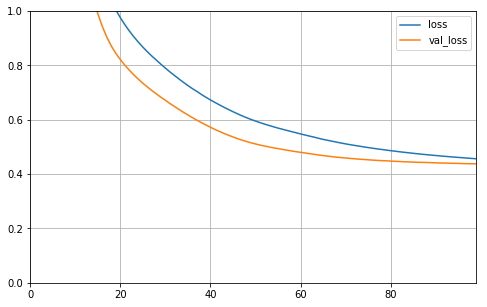

learning_rate:  0.0003


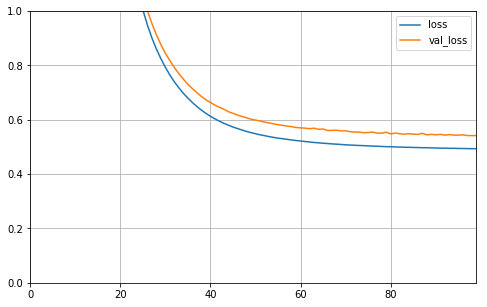

learning_rate:  0.001


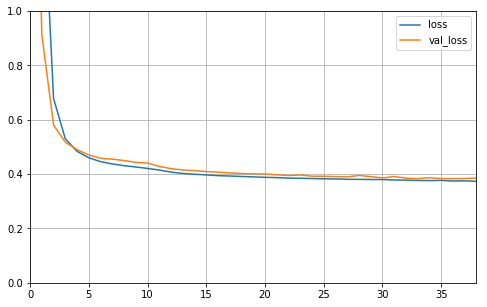

learning_rate:  0.003


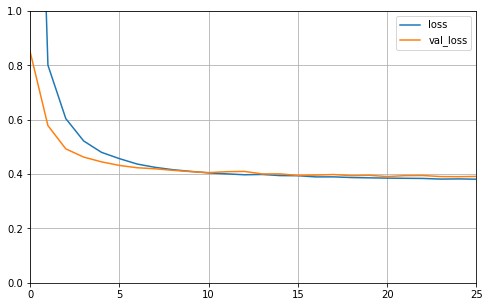

learning_rate:  0.01


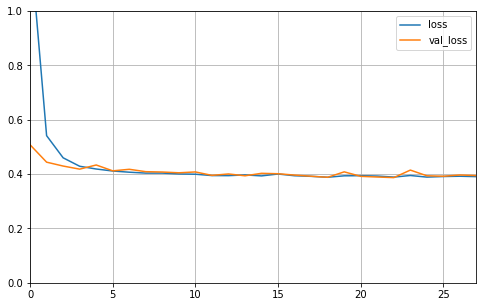

learning_rate:  0.03


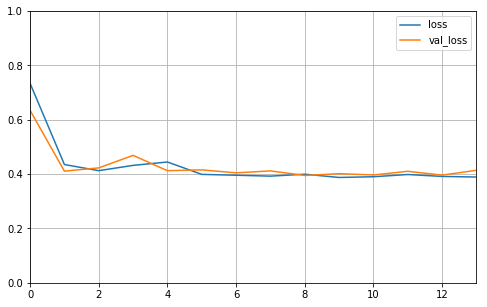

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
for lr, history in zip(learning_rate, histories):
    print("learning_rate: ", lr)
    plot_learning_curves(history)